# Band Gaps of CdSe Thin Films

## Importing libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

## Creating dataframes

In [74]:
df = pd.read_excel("CdSe_1.xlsx", sheet_name=None, engine="openpyxl", skiprows=12)
df

{'Hoja1':      No.  Wavelength   Trans1   Trans2  Trans3  Trans4  Trans5  Trans6  \
 0      1         950  66.9336  72.6834 -0.7428     NaN     NaN     NaN   
 1      2         947  66.8647  72.4585     NaN     NaN     NaN     NaN   
 2      3         944  66.9890  72.4940     NaN     NaN     NaN     NaN   
 3      4         941  67.0649  72.5565     NaN     NaN     NaN     NaN   
 4      5         938  66.8673  72.1641     NaN     NaN     NaN     NaN   
 ..   ...         ...      ...      ...     ...     ...     ...     ...   
 179  180         413   0.8324   1.4039     NaN     NaN     NaN     NaN   
 180  181         410   0.7739   1.3175     NaN     NaN     NaN     NaN   
 181  182         407   0.7091   1.2327     NaN     NaN     NaN     NaN   
 182  183         404   0.6560   1.1463     NaN     NaN     NaN     NaN   
 183  184         401   0.6089   1.0655     NaN     NaN     NaN     NaN   
 
      Visible  Remark  
 0          0     NaN  
 1          1     NaN  
 2          0    

### Creating dataframes for each sheet and dropping columns that we are not interested in

As we see, each sheet has a different number of rows because of the measures taken, so we will create different dataframes for each one.

In [75]:
m_1 = df["Hoja1"]
m_2 = df["Hoja2"]

In [76]:
m_1.head()

,No.,Wavelength,Trans1,Trans2,Trans3,Trans4,Trans5,Trans6,Visible,Remark
0,1,950,66.9336,72.6834,-0.7428,NaN,NaN,NaN,0,NaN
1,2,947,66.8647,72.4585,NaN,NaN,NaN,NaN,1,NaN
2,3,944,66.9890,72.4940,NaN,NaN,NaN,NaN,0,NaN
3,4,941,67.0649,72.5565,NaN,NaN,NaN,NaN,0,NaN
4,5,938,66.8673,72.1641,NaN,NaN,NaN,NaN,0,NaN


In [77]:
m_2.head()

,No.,Wavelength,Trans3,Trans4,Trans5,Trans6,Visible
0,1,900,66.0127,49.8294,41.9016,66.1744,0
1,2,897,65.9223,49.6293,41.8335,66.0067,0
2,3,894,66.3274,49.5752,41.8938,65.9867,0
3,4,891,66.3664,49.4612,41.9758,65.9247,0
4,5,888,66.3369,49.1999,41.8843,65.8270,0


We will only need the columns where the measures of transmittances are located, so we will drop any other column in the dataframes.

In [78]:
m_1.drop(["No.", "Visible", "Remark"], axis=1, inplace=True)
m_1

,Wavelength,Trans1,Trans2,Trans3,Trans4,Trans5,Trans6
0,950,66.9336,72.6834,-0.7428,NaN,NaN,NaN
1,947,66.8647,72.4585,NaN,NaN,NaN,NaN
2,944,66.9890,72.4940,NaN,NaN,NaN,NaN
3,941,67.0649,72.5565,NaN,NaN,NaN,NaN
4,938,66.8673,72.1641,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
179,413,0.8324,1.4039,NaN,NaN,NaN,NaN
180,410,0.7739,1.3175,NaN,NaN,NaN,NaN
181,407,0.7091,1.2327,NaN,NaN,NaN,NaN
182,404,0.6560,1.1463,NaN,NaN,NaN,NaN


In [79]:
m_2.drop(["No.", "Visible"], axis=1, inplace=True)
m_2

,Wavelength,Trans3,Trans4,Trans5,Trans6
0,900,66.0127,49.8294,41.9016,66.1744
1,897,65.9223,49.6293,41.8335,66.0067
2,894,66.3274,49.5752,41.8938,65.9867
3,891,66.3664,49.4612,41.9758,65.9247
4,888,66.3369,49.1999,41.8843,65.8270
...,...,...,...,...,...
162,414,0.4742,0.1786,1.4596,0.3757
163,411,0.4425,0.1707,1.3845,0.3477
164,408,0.4111,0.1632,1.3118,0.3263
165,405,0.3742,0.1565,1.2383,0.2994


### Changing column names

Trans1 column corresponds to m8_CdSe.  
Trans2 column corresponds to m9_CdSe.  
Trans3 column corresponds to m3_CdSe_CdCl2_muffle.  
Trans4 column corresponds to m4_CdSe_CdCl2.  
Trans5 column corresponds to m6_CdSe_MgCl2.  
Trans6 column corresponds to m5_CdSe_MgCl2_muffle.  

In [80]:
m_1.rename(columns={
    "Trans1": "m8_CdSe",
    "Trans2": "m9_CdSe",
    }, 
    inplace=True)

m_1.head()

,Wavelength,m8_CdSe,m9_CdSe,Trans3,Trans4,Trans5,Trans6
0,950,66.9336,72.6834,-0.7428,NaN,NaN,NaN
1,947,66.8647,72.4585,NaN,NaN,NaN,NaN
2,944,66.9890,72.4940,NaN,NaN,NaN,NaN
3,941,67.0649,72.5565,NaN,NaN,NaN,NaN
4,938,66.8673,72.1641,NaN,NaN,NaN,NaN


In [81]:
m_2.rename(columns={
    "Trans3": "m3_CdSe_CdCl2_muffle",
    "Trans4": "m4_CdSe_CdCl2",
    "Trans5": "m6_CdSe_MgCl2",
    "Trans6": "m5_CdSe_MgCl2_muffle"
    },
    inplace=True)

m_2.head()

,Wavelength,m3_CdSe_CdCl2_muffle,m4_CdSe_CdCl2,m6_CdSe_MgCl2,m5_CdSe_MgCl2_muffle
0,900,66.0127,49.8294,41.9016,66.1744
1,897,65.9223,49.6293,41.8335,66.0067
2,894,66.3274,49.5752,41.8938,65.9867
3,891,66.3664,49.4612,41.9758,65.9247
4,888,66.3369,49.1999,41.8843,65.8270


### Checking if there are null values in each dataframe.

#### For m_1

In [82]:
m_1[pd.isnull(m_1).any(axis=1)]

,Wavelength,m8_CdSe,m9_CdSe,Trans3,Trans4,Trans5,Trans6
0,950,66.9336,72.6834,-0.7428,NaN,NaN,NaN
1,947,66.8647,72.4585,NaN,NaN,NaN,NaN
2,944,66.9890,72.4940,NaN,NaN,NaN,NaN
3,941,67.0649,72.5565,NaN,NaN,NaN,NaN
4,938,66.8673,72.1641,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
179,413,0.8324,1.4039,NaN,NaN,NaN,NaN
180,410,0.7739,1.3175,NaN,NaN,NaN,NaN
181,407,0.7091,1.2327,NaN,NaN,NaN,NaN
182,404,0.6560,1.1463,NaN,NaN,NaN,NaN


Dropping the columns with null values:

In [83]:
m_1.dropna(axis=1, inplace=True)
m_1

,Wavelength,m8_CdSe,m9_CdSe
0,950,66.9336,72.6834
1,947,66.8647,72.4585
2,944,66.9890,72.4940
3,941,67.0649,72.5565
4,938,66.8673,72.1641
...,...,...,...
179,413,0.8324,1.4039
180,410,0.7739,1.3175
181,407,0.7091,1.2327
182,404,0.6560,1.1463


#### For m_2

In [84]:
m_2[pd.isnull(m_2).any(axis=1)]

,Wavelength,m3_CdSe_CdCl2_muffle,m4_CdSe_CdCl2,m6_CdSe_MgCl2,m5_CdSe_MgCl2_muffle


There are no null values in m_2.

## Transmittance Analysis

### Using Plotly to locate maximum transmittances in a graph

#### Part 1 using Plotly

In [85]:
fig_1 = px.line(
    m_1,
    x="Wavelength",
    y=["m8_CdSe", "m9_CdSe"],
    markers=True,
    title="Transmittance of CdSe thin films-Part 1 (Plotly)"
)

fig_1.update_layout(title_x=0.5, yaxis_title="Transmittance (%)")
fig_1.update_xaxes(linecolor="black", mirror=True)
fig_1.update_yaxes(linecolor="black", mirror=True)

fig_1.show()

#### Part 2 using Plotly

In [86]:
fig_2 = px.line(
    m_2,
    x="Wavelength",
    y=["m3_CdSe_CdCl2_muffle", "m4_CdSe_CdCl2", "m6_CdSe_MgCl2", "m5_CdSe_MgCl2_muffle"],
    markers=True,
    title="Transmittance of four CdSe thin films-Part 2(Plotly)"
)

fig_2.update_layout(title_x=0.5, yaxis_title="Transmittance (%)")
fig_2.update_xaxes(linecolor="black", mirror=True)
fig_2.update_yaxes(linecolor="black", mirror=True)

fig_2.show()

### Using pandas to find maximum transmittances

#### Part 1 using Pandas

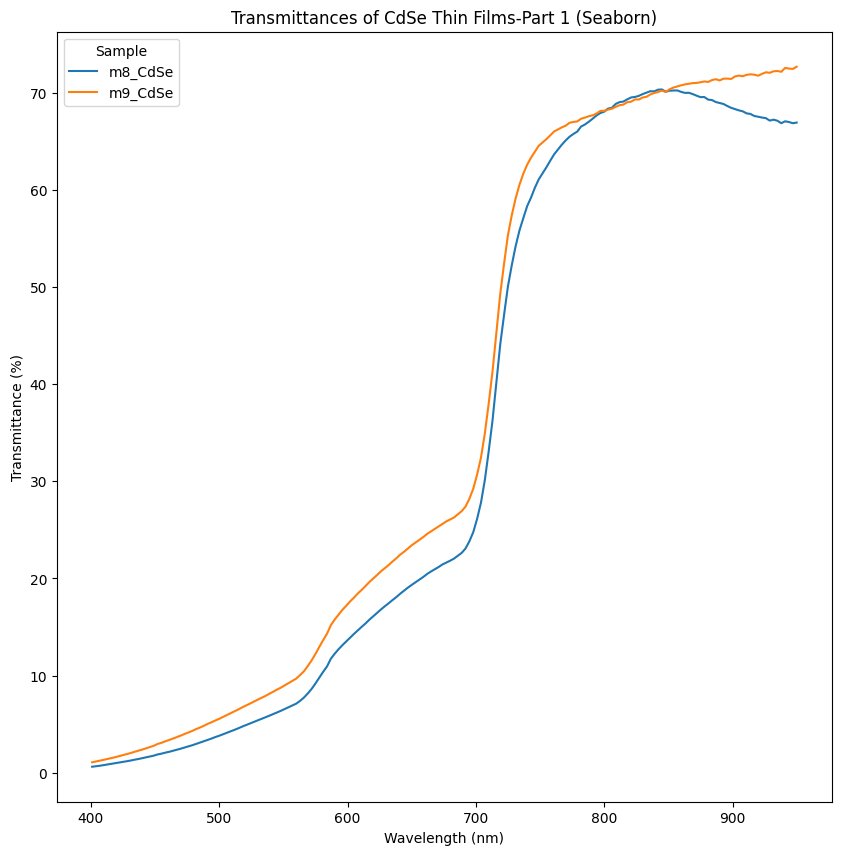

In [87]:
# Melting m_1 to create a plot with sns
m_1m = m_1.melt("Wavelength", var_name="Sample", value_name="Transmittance (%)")

fig_3, ax1 = plt.subplots(figsize=(10, 10))
trans_part1 = sns.lineplot(
    data=m_1m,
    x=m_1m["Wavelength"],
    y=m_1m["Transmittance (%)"],
    hue="Sample"
)

ax1.set_title("Transmittances of CdSe Thin Films-Part 1 (Seaborn)")
ax1.set_xlabel("Wavelength (nm)")

plt.show()

##### Searching for mamixmum transmittances in m8_CdSe and m9_CdSe 

In [88]:
# Creating a dataframe for sample 1 and 2
df_m8 = m_1m.loc[m_1m["Sample"] == "m8_CdSe"]
df_m9 = m_1m.loc[m_1m["Sample"] == "m9_CdSe"]

For m8_CdSe

In [89]:
max_tm8 = df_m8.loc[df_m8["Transmittance (%)"] == df_m8["Transmittance (%)"].max()]
max_tm8

,Wavelength,Sample,Transmittance (%)
35,845,m8_CdSe,70.3447


The maximum transmittance for m8_CdSe is of $70.3447$% at a wavelength of $845$ $nm$.

For m9_CdSe

In [90]:
max_tm9 = df_m9.loc[df_m9["Transmittance (%)"] == df_m9["Transmittance (%)"].max()]
max_tm9

,Wavelength,Sample,Transmittance (%)
184,950,m9_CdSe,72.6834


The maximum transmittance for m8_CdSe is of $72.6834$% at a wavelength of $950$ $nm$.

#### Part 2 using Pandas

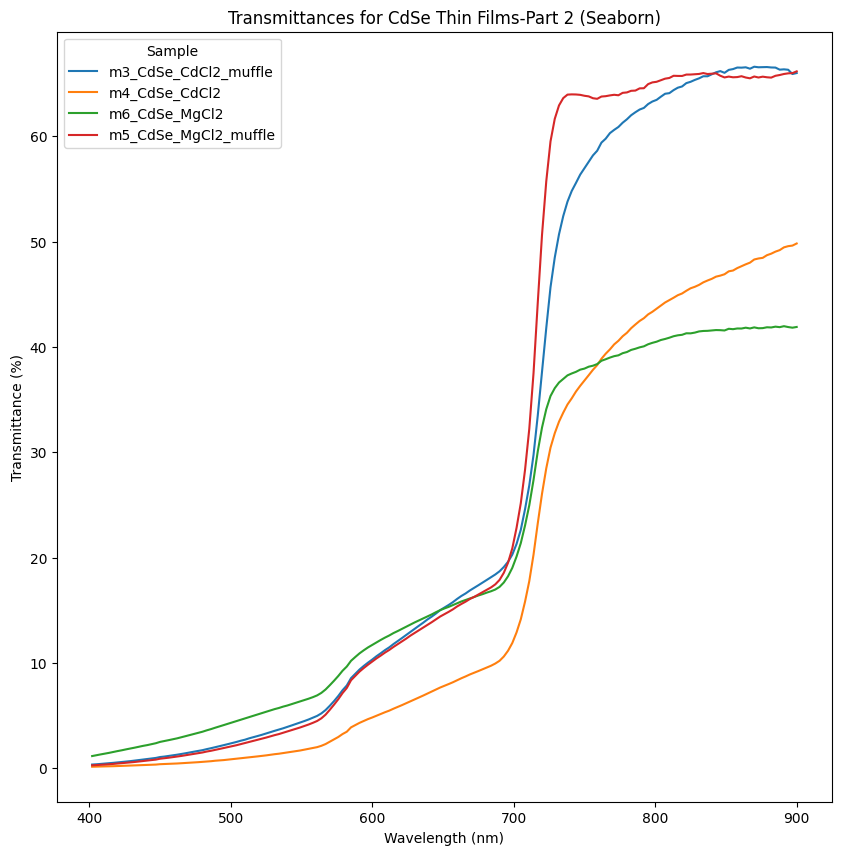

In [91]:
# Melting m_2 to create a plot with sns
m_2m = m_2.melt("Wavelength", var_name="Sample", value_name="Transmittance (%)")

fig_4, ax2 = plt.subplots(figsize=(10, 10))
trans_part1 = sns.lineplot(
    data=m_2m,
    x=m_2m["Wavelength"],
    y=m_2m["Transmittance (%)"],
    hue="Sample"
)

ax2.set_title("Transmittances for CdSe Thin Films-Part 2 (Seaborn)")
ax2.set_xlabel("Wavelength (nm)")

plt.show()

##### Searching for maximum transmittances in m3_CdSe_CdCl2_muffle, m4_CdSe_CdCl2, m6_CdSe_MgCl2 and m5_CdSe_MgCl2_muffle

In [92]:
# Creating a dataframe for samples 3, 4, 5 and 6 to search maximum transmittances
df_m3 = m_2m.loc[m_2m["Sample"] == "m3_CdSe_CdCl2_muffle"]
df_m4 = m_2m.loc[m_2m["Sample"] == "m4_CdSe_CdCl2"]
df_m6 = m_2m.loc[m_2m["Sample"] == "m6_CdSe_MgCl2"]
df_m5 = m_2m.loc[m_2m["Sample"] == "m5_CdSe_MgCl2_muffle"]

For m3_CdSe_CdCl2_muffle

In [93]:
# Searching for maxmimum value
max_tm3 = df_m3.loc[df_m3["Transmittance (%)"] == df_m3["Transmittance (%)"].max()]
max_tm3

,Wavelength,Sample,Transmittance (%)
10,870,m3_CdSe_CdCl2_muffle,66.6151


The maximum transmittance for m3_CdSe_CdCl2_muffle is of $66.6151$% at a wavelength of $870$ $nm$.

For m4_CdSe_CdCl2

In [94]:
# Searching for maxmimum value
max_tm4 = df_m4.loc[df_m4["Transmittance (%)"] == df_m4["Transmittance (%)"].max()]
max_tm4

,Wavelength,Sample,Transmittance (%)
167,900,m4_CdSe_CdCl2,49.8294


The maximum transmittance for m4_CdSe_CdCl2 is of $49.8294$% at a wavelength of $900$ $nm$.

For m6_CdSe_MgCl2

In [95]:
# Searching for maxmimum value
max_tm6 = df_m6.loc[df_m6["Transmittance (%)"] == df_m6["Transmittance (%)"].max()]
max_tm6

,Wavelength,Sample,Transmittance (%)
337,891,m6_CdSe_MgCl2,41.9758


The maximum transmittance for m6_CdSe_MgCl2 is of $41.9758$% at a wavelength of $891$ $nm$.

For m5_CdSe_MgCl2_muffle

In [96]:
# Searching for maxmimum value
max_tm5 = df_m5.loc[df_m5["Transmittance (%)"] == df_m5["Transmittance (%)"].max()]
max_tm5

,Wavelength,Sample,Transmittance (%)
501,900,m5_CdSe_MgCl2_muffle,66.1744


The maximum transmittance for m5_CdSe_MgCl2_muffle is of $66.1744$% at a wavelength of $900$ $nm$.

## Calculating the energy gap

### Thicknesses of CdSe thin films

The thickness for m8_CdSe is $103.120$ $nm$.  
The thickness for m9_CdSe is $122.586$ $nm$.  
The thickness for m3_CdSe_CdCl2_muffle is $201.53$ $nm$.  
The thickness for m4_CdSe_CdCl2 is $357.21$ $nm$.  
The thickness for m6_CdSe_MgCl2 is $124.66$ $nm$.  
The thickness for m5_CdSe_MgCl2_muffle is $556.1$ $nm$.  

In [97]:
d8 = (103.120) * (1E-7) 
d9 = (122.586) * (1E-7) 
d3 = (201.53) * (1E-7) 
d4 = (357.21) * (1E-7) 
d6 = (124.66) * (1E-7) 
d5 = (556.1) * (1E-7) 

### Creating new dataframes with wavelengths expressed as energies and their absorption coefficients

In [98]:
df_slist = [df_m8, df_m9, df_m3, df_m4, df_m6, df_m5]
thickness = [d8, d9, d3, d4, d6, d5]
energy_abs = {}
sample_counter = 0

for frame in df_slist:
    energy = 1240/frame["Wavelength"]
    abs_coef = - (1/thickness[sample_counter]) * (np.log(frame["Transmittance (%)"]/100))
    sq_abs_coef = abs_coef ** 2
    sample = frame["Sample"]
    abs_data = {
        "Energy (eV)": energy,
        "Alpha (cm^-1)": abs_coef,
        "Alpha^2 (cm^-2)": sq_abs_coef,
        "Sample": sample
    }
    
    sample_counter += 1

    df_abs = pd.DataFrame(abs_data)
    energy_abs[f"Touc_{sample_counter}"] = df_abs

energy_abs

{'Touc_1':      Energy (eV)  Alpha (cm^-1)  Alpha^2 (cm^-2)   Sample
 0       1.305263   38932.224863     1.515718e+09  m8_CdSe
 1       1.309398   39032.099624     1.523505e+09  m8_CdSe
 2       1.313559   38851.993714     1.509477e+09  m8_CdSe
 3       1.317747   38742.181800     1.500957e+09  m8_CdSe
 4       1.321962   39028.328897     1.523210e+09  m8_CdSe
 ..           ...            ...              ...      ...
 179     3.002421  464372.805513     2.156421e+11  m8_CdSe
 180     3.024390  471439.371479     2.222551e+11  m8_CdSe
 181     3.046683  479919.405029     2.303226e+11  m8_CdSe
 182     3.069307  487467.482159     2.376245e+11  m8_CdSe
 183     3.092269  494692.728312     2.447209e+11  m8_CdSe
 
 [184 rows x 4 columns],
 'Touc_2':      Energy (eV)  Alpha (cm^-1)  Alpha^2 (cm^-2)   Sample
 184     1.305263   26027.210542     6.774157e+08  m9_CdSe
 185     1.309398   26280.015810     6.906392e+08  m9_CdSe
 186     1.313559   26240.058912     6.885407e+08  m9_CdSe
 187     

To see each dataframe for energy and absorption coefficient separately, it will be enough to write energy_abs["Touc_1"] and so on.  
For example:

In [99]:
energy_abs["Touc_1"]

,Energy (eV),Alpha (cm^-1),Alpha^2 (cm^-2),Sample
0,1.305263,38932.224863,1.515718e+09,m8_CdSe
1,1.309398,39032.099624,1.523505e+09,m8_CdSe
2,1.313559,38851.993714,1.509477e+09,m8_CdSe
3,1.317747,38742.181800,1.500957e+09,m8_CdSe
4,1.321962,39028.328897,1.523210e+09,m8_CdSe
...,...,...,...,...
179,3.002421,464372.805513,2.156421e+11,m8_CdSe
180,3.024390,471439.371479,2.222551e+11,m8_CdSe
181,3.046683,479919.405029,2.303226e+11,m8_CdSe
182,3.069307,487467.482159,2.376245e+11,m8_CdSe


### Looking for the region with linear behaviour

In [100]:
for x, y in energy_abs.items():
    working_with = y["Sample"].loc[y.index[0]]
    linb_fig = px.line(
        energy_abs[x],
        x=y["Energy (eV)"],
        y=y["Alpha^2 (cm^-2)"],
        markers=True,
        color=y["Sample"],
        title=f"Squared Absorption coefficient in function of the energy for {working_with}"
    )

    linb_fig.update_layout(title_x=0.5)
    linb_fig.update_xaxes(linecolor="black", mirror=True)
    linb_fig.update_yaxes(linecolor="black", mirror=True)
    linb_fig.show()

For all the plots, we see a linear behaviour around $1.705$ $eV$ ($727.27$ $nm$) to $1.79$ $eV$ ($692.73$ $nm$) in the first slope, so we will do the adjustment in this parts. The other slopes will be ignored due to contributions of other layers.

### By Tauc Law

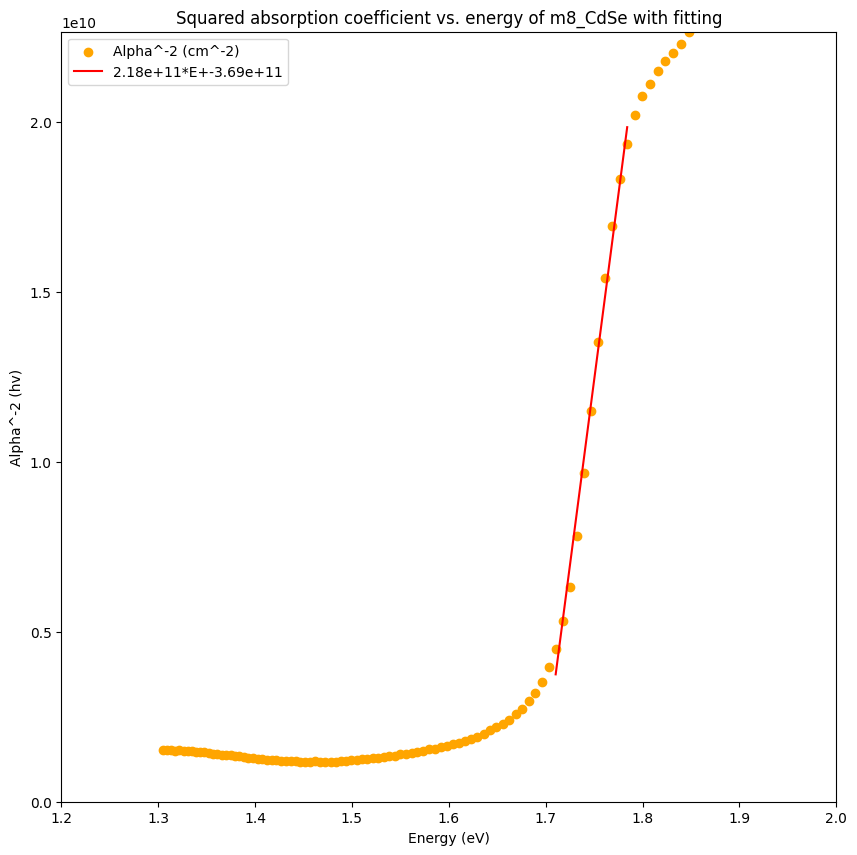

The band gap for m8_CdSe is 1.69 eV


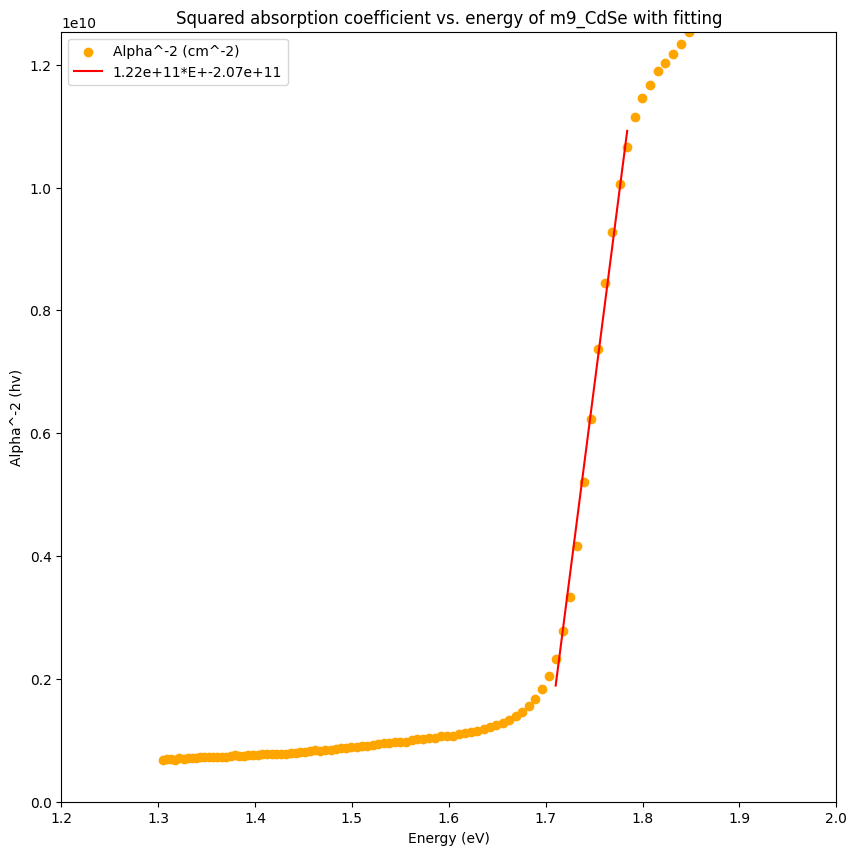

The band gap for m9_CdSe is 1.69 eV


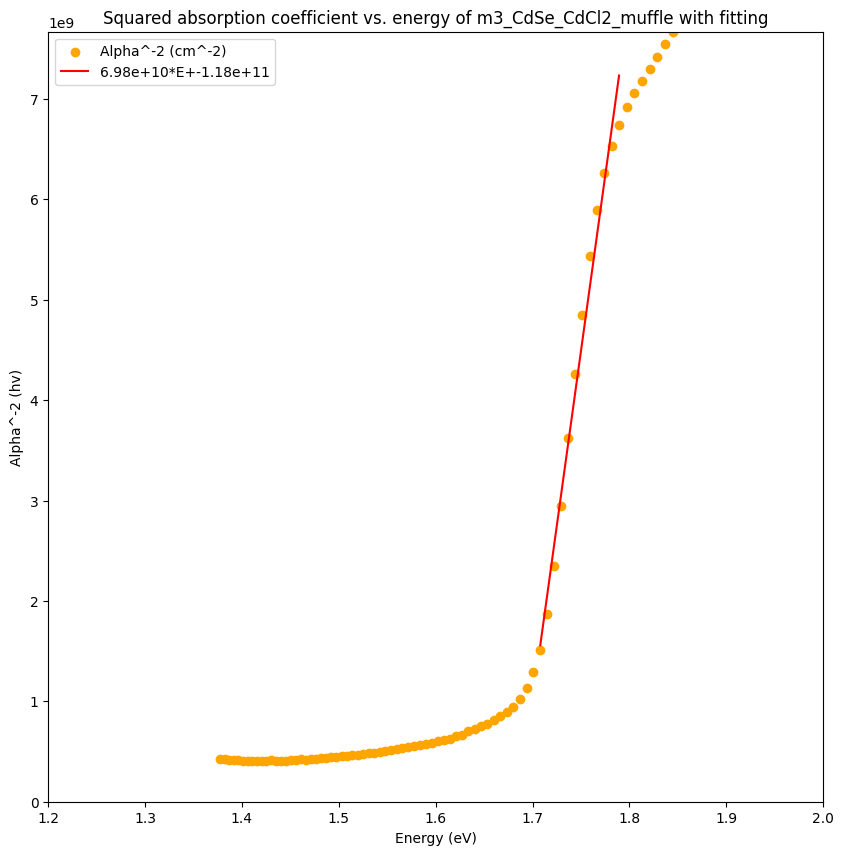

The band gap for m3_CdSe_CdCl2_muffle is 1.69 eV


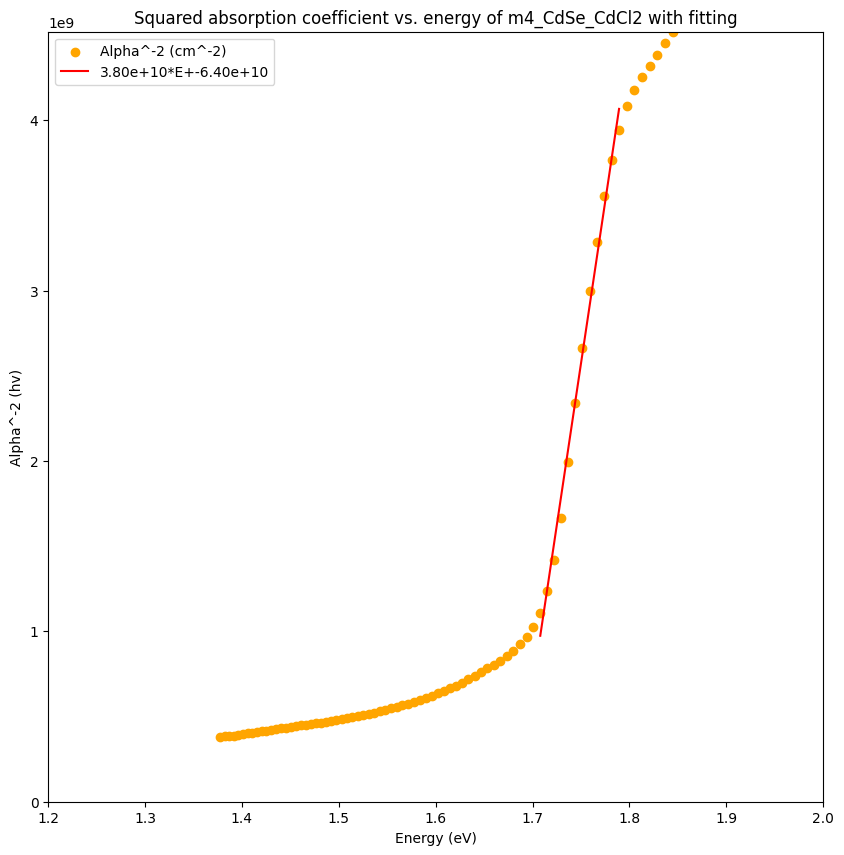

The band gap for m4_CdSe_CdCl2 is 1.68 eV


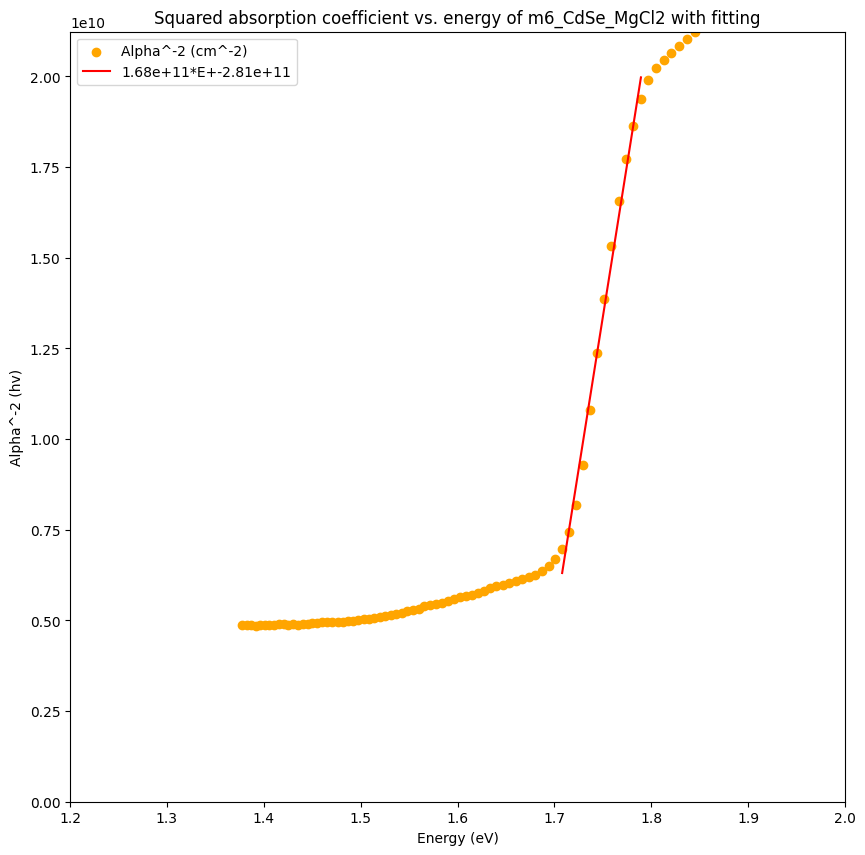

The band gap for m6_CdSe_MgCl2 is 1.67 eV


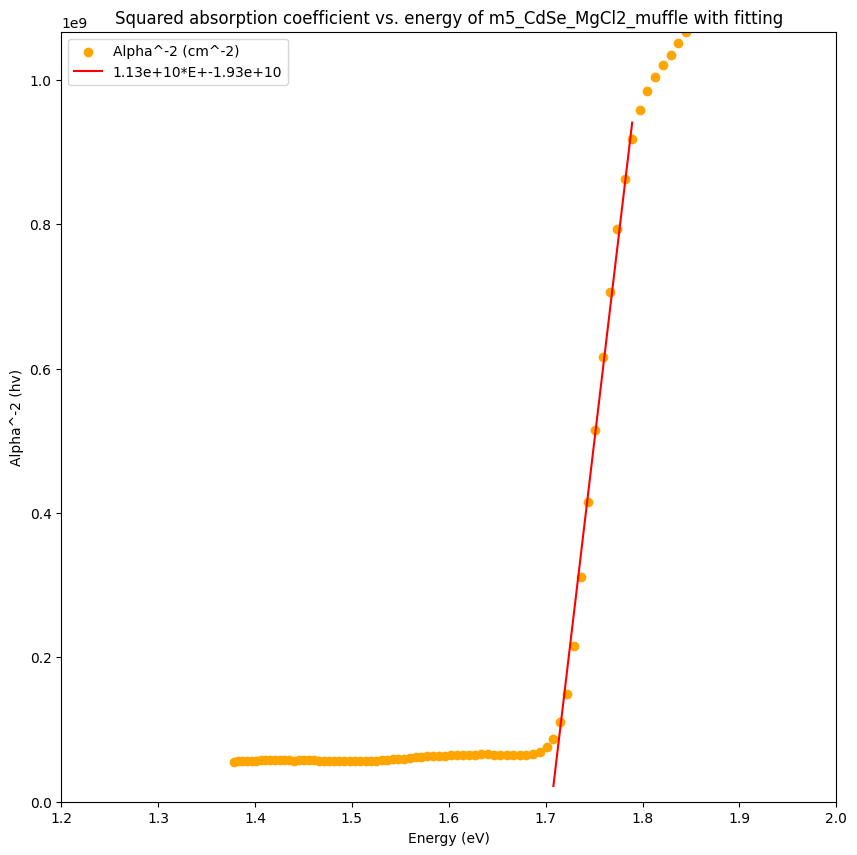

The band gap for m5_CdSe_MgCl2_muffle is 1.71 eV


In [101]:
for x, y in energy_abs.items():
    slope, inter, r, p, se = linregress(
        x=y[(y["Energy (eV)"] >= 1.705) & (y["Energy (eV)"] <= 1.79)]["Energy (eV)"],
        y=y[(y["Energy (eV)"] >= 1.705) & (y["Energy (eV)"] <= 1.79)]["Alpha^2 (cm^-2)"]
    )

    adj_fig, adj_ax = plt.subplots(figsize=(10, 10))
    adj_ax.scatter(data=y, x="Energy (eV)", y="Alpha^2 (cm^-2)", color="orange")
    adj_ax.plot(
        y[(y["Energy (eV)"] >= 1.705) & (y["Energy (eV)"] <= 1.79)]["Energy (eV)"],
        slope * y[(y["Energy (eV)"] >= 1.705) & (y["Energy (eV)"] <= 1.79)]["Energy (eV)"] + inter,
        color="red"
    )

    working_with = y["Sample"].loc[y.index[0]]
    adj_ax.set_xlabel("Energy (eV)")
    adj_ax.set_ylabel("Alpha^-2 (hv)")
    plt.title(f"Squared absorption coefficient vs. energy of {working_with} with fitting")
    plt.legend(["Alpha^-2 (cm^-2)", f"{'{:.2e}'.format(slope)}*E+{'{:.2e}'.format(inter)}"])
    plt.xlim(1.2, 2.0)
    plt.ylim(0, y[(y["Energy (eV)"] >= 1.705) & (y["Energy (eV)"] <= 1.85)]["Alpha^2 (cm^-2)"].max())
    plt.show()

    print(f"The band gap for {working_with} is {round(-inter / slope, 2)} eV")

### By the derivative method

Let´s start by concatenating the dataframes m_1m and m_2m

In [103]:
dev_df = pd.concat(
    [m_1m[(m_1m["Wavelength"] >= 692) & (m_1m["Wavelength"] <= 727)],
    m_2m[(m_2m["Wavelength"] >= 692) & (m_2m["Wavelength"] <= 727)]]
    )

dev_df

,Wavelength,Sample,Transmittance (%)
75,725,m8_CdSe,50.0656
76,722,m8_CdSe,47.1445
77,719,m8_CdSe,44.0793
78,716,m8_CdSe,40.1454
79,713,m8_CdSe,36.2691
...,...,...,...
566,705,m5_CdSe_MgCl2_muffle,25.1720
567,702,m5_CdSe_MgCl2_muffle,22.8279
568,699,m5_CdSe_MgCl2_muffle,20.8847
569,696,m5_CdSe_MgCl2_muffle,19.5213


In [109]:
for name in samps:
    w = dev_df["Wavelength"].to_numpy()
    t = dev_df["Transmittance (%)"].to_numpy()
    dev_df["dT_dw (a. u.)"] = np.diff(t, prepend=t[1]) / np.diff(w, prepend=w[1])

dev_df


,Wavelength,Sample,Transmittance (%),dT_dw (a. u.)
75,725,m8_CdSe,50.0656,0.973700
76,722,m8_CdSe,47.1445,0.973700
77,719,m8_CdSe,44.0793,1.021733
78,716,m8_CdSe,40.1454,1.311300
79,713,m8_CdSe,36.2691,1.292100
...,...,...,...,...
566,705,m5_CdSe_MgCl2_muffle,25.1720,1.054100
567,702,m5_CdSe_MgCl2_muffle,22.8279,0.781367
568,699,m5_CdSe_MgCl2_muffle,20.8847,0.647733
569,696,m5_CdSe_MgCl2_muffle,19.5213,0.454467


Using pandas to calculate the energy gap and locating it in a graph

C:\Users\Memo\AppData\Local\Temp\ipykernel_14420\281556554.py:15: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Memo\AppData\Local\Temp\ipykernel_14420\281556554.py:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Memo\AppData\Local\Temp\ipykernel_14420\281556554.py:15: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Memo\AppData\Local\Temp\ipykernel_14420\281556554.py:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Memo\AppData\Local\Temp\ipykernel_14420\281556554.py:15: FutureWarning:

Calling float on a single element Series is deprecated and will raise a Ty

For m8_CdSe the energy gap is E_g=1.73 eV.
For m9_CdSe the energy gap is E_g=1.74 eV.
For m3_CdSe_CdCl2_muffle the energy gap is E_g=1.73 eV.
For m4_CdSe_CdCl2 the energy gap is E_g=1.74 eV.
For m6_CdSe_MgCl2 the energy gap is E_g=1.74 eV.
For m5_CdSe_MgCl2_muffle the energy gap is E_g=1.74 eV.


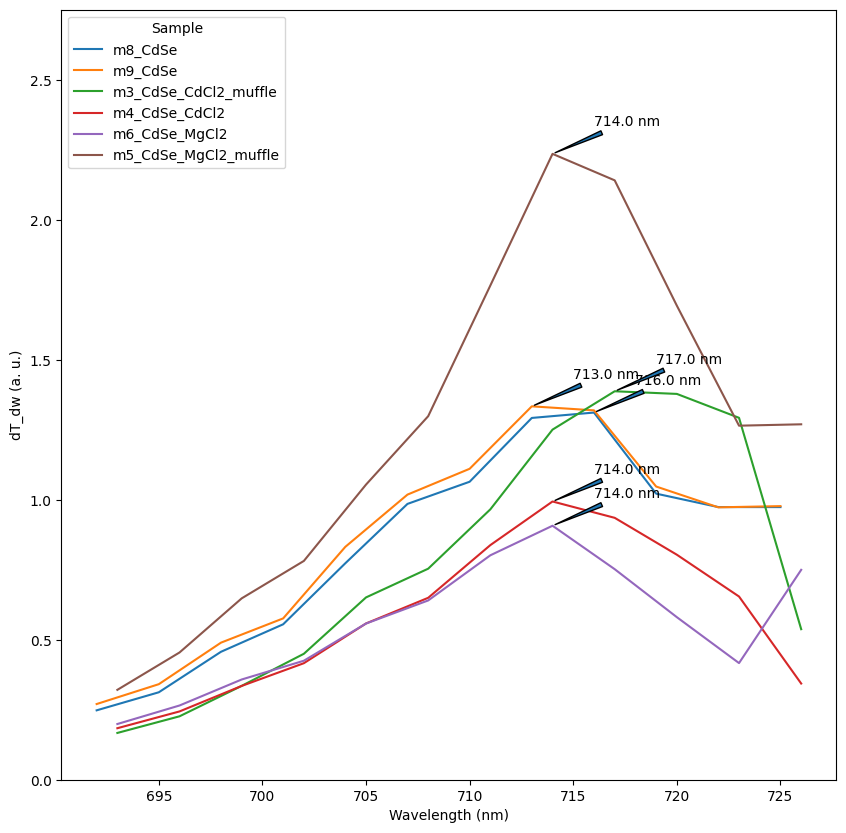

In [184]:
# Let's start by separating the thin films by name
tf_names = dev_df["Sample"].unique().tolist()

devg_plt, ax3 = plt.subplots(figsize=(10, 10))
dtdw_plot = sns.lineplot(
    data=dev_df,
    x=dev_df["Wavelength"],
    y=dev_df["dT_dw (a. u.)"],
    hue="Sample"
)

for tf in tf_names:
    max_dev = dev_df[dev_df["Sample"] == tf]["dT_dw (a. u.)"].max()
    max_wl = dev_df.loc[dev_df["dT_dw (a. u.)"] == max_dev]
    E_g = round(float(1240 / max_wl["Wavelength"]), 2)
    print(f"For {tf} the energy gap is E_g={E_g} eV.")

    # Locating the wavelengths in the graph
    plt.annotate(
        f"{float(max_wl['Wavelength'])} nm",
        xy=(max_wl["Wavelength"], max_wl["dT_dw (a. u.)"]),
        xytext=(max_wl["Wavelength"] + 2, max_wl["dT_dw (a. u.)"] + 0.1),
        arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0")
        )

plt.xlabel("Wavelength (nm)")
plt.ylim(0, 2.75)
plt.show()

Using Plotly to locate the energy gaps

In [118]:
dev_graph = px.line(
    dev_df,
    x="Wavelength",
    y="dT_dw (a. u.)",
    color="Sample",
    markers=True,
    title="Derivative of the transmittance spectra vs Wavelength for CdSe thin films (Plotly)"
)

dev_graph.update_layout(title_x=0.5, xaxis_title="Wavelength (nm)")
dev_graph.update_xaxes(linewidth=1, linecolor="black", mirror=True)
dev_graph.update_yaxes(linewidth=1, linecolor="black", mirror=True)
dev_graph.show()